In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("D:\Py_intern\Dataset\loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [7]:
df.fillna(method='ffill',inplace=True)

In [8]:
df.fillna(method='bfill',inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

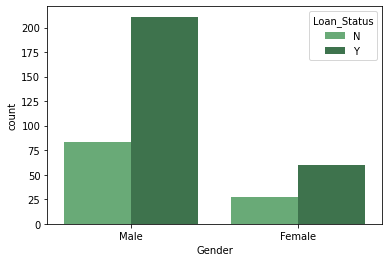

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

In [11]:
df1=pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
df1

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
1,LP001005,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
2,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
3,LP001008,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
4,LP001013,0,2333,1516.0,95.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,3+,5703,0.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,1
377,LP002974,0,3232,1950.0,108.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1
378,LP002978,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,0,1
379,LP002979,3+,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1


In [12]:
df1.drop('Gender_Female',axis=1,inplace=True)
df1.drop('Married_No',axis=1,inplace=True)
df1.drop('Education_Graduate',axis=1,inplace=True)
df1.drop('Self_Employed_No',axis=1,inplace=True)
df1.drop('Property_Area_Rural',axis=1,inplace=True)
df1.drop('Loan_Status_N',axis=1,inplace=True)

In [13]:
df1.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
2,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
3,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
4,LP001013,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1


In [14]:
X = df1[["Gender_Male","Married_Yes","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]].values
y=df1["Loan_Status_Y"].values

In [15]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression 

m1=LogisticRegression()
m1.fit(xtrain,ytrain)
yp1=m1.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))

Logistic Regression :
 accuracy is  0.7012987012987013
 precision score is  0.7105263157894737
 recall is  0.9818181818181818
 f1 score is  0.8244274809160306


In [22]:
result = pd.DataFrame({'Actual Values in dataset': ytest, 'Predicted Values by the model': yp1})
print(result)

    Actual Values in dataset  Predicted Values by the model
0                          1                              1
1                          0                              1
2                          1                              1
3                          1                              1
4                          0                              1
..                       ...                            ...
72                         1                              1
73                         1                              1
74                         1                              1
75                         1                              1
76                         1                              1

[77 rows x 2 columns]
